In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np 
from scipy.stats import sem

ModuleNotFoundError: No module named 'scipy'

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
mouse_df = os.path.join("data","mouse_drug_data.csv")
clinical_df = os.path.join("data","clinicaltrial_data.csv")

In [18]:
df1 = pd.read_csv(mouse_df)
df2 = pd.read_csv(clinical_df)

In [19]:
df1

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [20]:
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [21]:
df = pd.merge(df1,df2,on="Mouse ID",how="left")

In [22]:
df_grouped = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]
avrage_tumor = df_grouped.mean()
avrage_tumor = avrage_tumor .reset_index()
avrage_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [23]:
standard_error = df_grouped.sem()
standard_error_df = pd.DataFrame(standard_error)
standard_error_df.reset_index(inplace = True)
standard_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [24]:
pivot_avrage_tumor = avrage_tumor.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
pivot_avrage_tumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [25]:
cleaned_pivot_avrage_tumor = pivot_avrage_tumor.drop([
    "Ceftamin",
    "Naftisol",
    "Propriva",
    "Ramicane",
    "Stelasyn",
    "Zoniferol"],
    axis = 1)
cleaned_pivot_avrage_tumor

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


NameError: name 'sem' is not defined

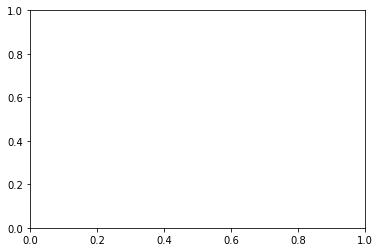

In [26]:
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
colors =["red","blue","green","black"]
markers =["o","^","s","d"]
fig ,ax = plt.subplots()
for drug in drugs:
    x_axis = pivot_avrage_tumor.index.values
    y_axis = pivot_avrage_tumor[drug]
    err = sem(cleaned_pivot_avrage_tumor[drug])
    index = drugs.index(drug)
    ax.errorbar(x_axis,y_axis,err,linestyle = "--",
                color = colors[index],
                marker = markers[index],
                capsize = 2.5,capthick = 1.5,
                markeredgecolor = "black")
    ax.legend(loc = "best",labels = drugs,fancybox = True,fontsize = 13)
plt.grid(linestyle = "dotted")
ax.set_xlim(0,45)
ax.set_ylim(34,75)
ax.set_title("Tumor Response to Treatment",fontsize = 12)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()



Observable Trend Concerning Average Tumor Volume:
The mice that were given Ketapril, nfubinol ,and the Placebo had an increase in the average tumor volume over the 45 days ,but the mice that were given Capomuline had a decrease in the average tumor colume over tne 45 days. The resoult shows that there is not a significantly different result between Ketapril, nfubinol ,and the Placebo. however, the Capomulin decreases tumor volume.

In [27]:
met_sit = df.groupby(["Drug","Timepoint",])["Metastatic Sites"]
means = met_sit.mean()
means = means.reset_index()
means.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [28]:
met_standard = met_sit.sem()
sems = pd.DataFrame(met_standard)
sems.reset_index(inplace = True)
sems.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [29]:
pivot_avarage = means.pivot(index = "Timepoint",columns = "Drug",values = "Metastatic Sites")

pivot_avarage.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [30]:
met_response =pd.pivot_table(df,index=["Timepoint"],values = "Metastatic Sites",
    columns =["Drug"], aggfunc = np.mean)
cleaned_ms = met_response.drop([
        "Ceftamin",
        "Naftisol",
        "Propriva",
        "Ramicane",
        "Stelasyn",
        "Zoniferol"],                                                              
    axis = 1)
cleaned_ms

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


NameError: name 'sem' is not defined

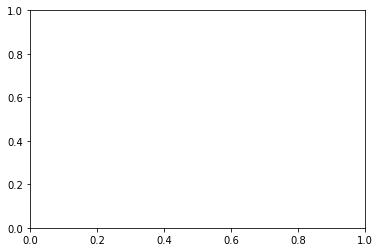

In [31]:
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
colors =["red","blue","green","black"]
markers =["o","^","s","d"]
fig ,ax =plt.subplots()
for drug in drugs:
    x_data = cleaned_ms.index.values
    y_data = cleaned_ms[drug]
    err = sem(cleaned_ms[drug])
    index = drugs.index(drug)
    ax.errorbar(x_data, y_data,err,linestyle = ":",
                color = colors[index],
                marker = markers[index],
                capsize = 2.5,capthick = 1.5,
                markeredgecolor = "black"
           )

ax.legend(loc = "upper left", labels = drugs, fancybox = True,fontsize = 13)
plt.grid(linestyle = "dotted")
ax.set_xlim(0,45)
ax.set_ylim(0,4)
ax.set_title("Metastatic Spred During Treatment",fontsize = 15)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
plt.show()

Observable Trend Concerning the Average of Metastatic Sites: 
over the 45 days,the Placebo having the highest average metastatic sites at all times and also Ketapril had statistically no effect.However, by day 45 only Capomulin and Infubinol had statistically significant lower average metastatic sites than the placebo.

In [32]:
survive_rate = pd.pivot_table(df,index = ["Timepoint"],values = "Tumor Volume (mm3)",
    columns = ["Drug"], aggfunc = "count")
cleaned_survive = survive_rate.drop([
    "Ceftamin",
    "Naftisol",
    "Propriva",
    "Ramicane",
    "Stelasyn",
    "Zoniferol"],
    axis = 1)
cleaned_survive

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


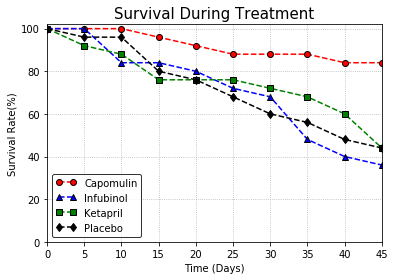

In [33]:
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
colors = ["red","blue","green","black"]
markers = ["o","^","s","d"]
fig ,ax = plt.subplots()
for drug in drugs:
    x_data = cleaned_survive.index.values
    y_data = cleaned_survive[drug]* 100 / cleaned_survive[drug][0]
    index = drugs.index(drug)
    ax.plot(x_data, y_data,linestyle = "--",
                color = colors[index],
                marker = markers[index],
                markeredgecolor = "black" )

ax.legend(loc = "down left", labels = drugs, fancybox = True, numpoints = 2,edgecolor = "black")
plt.grid(linestyle = "dotted")
ax.set_xlim(0,45)
ax.set_ylim(0,102)
ax.set_title("Survival During Treatment",fontsize=15)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate(%)")
plt.show()

Observable Trend Concerning the Survival Rate Over 45 days:
Capomulin, has siginicantly higher survival rate during the 45 days. Ketapril and Infubinol had same survaival rate dropped with almost edual rate till day 30 but after that Infubinol had dropped.

In [34]:
summary = round(((
    cleaned_pivot_avrage_tumor.iloc[9,:]-cleaned_pivot_avrage_tumor.iloc[0,:])*100/
    cleaned_pivot_avrage_tumor.iloc[0,:]),0).to_frame()
summary = summary.rename(columns = {0:"%Tumor Change"})
summary

,%Tumor Change
Drug,
Capomulin,-19.0
Infubinol,46.0
Ketapril,57.0
Placebo,51.0


In [35]:
percent_change = (pivot_avrage_tumor.iloc[-1]/(pivot_avrage_tumor.iloc[0])-1)*100
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

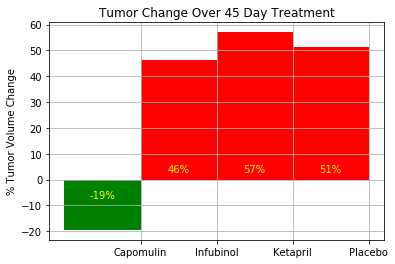

In [36]:
data_passing = percent_change < 0
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
change_list = ([ percent_change[drug]for drug in drugs])
plt_change = plt.bar(drugs, change_list, width = -1, align="edge",color= data_passing.map({ True:"g",False:"r"}))
plt.grid()
ax.set_ylim(-30,70)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2 
        else:
             label_position = -8
        plt.text(
            rect.get_x() + rect.get_width()/2.,
            label_position ,
            "%d" % int(height)+ "%",
            color= "yellow",
            ha = "center", va = "bottom")
autolabel (plt_change)

Observable Trend Concerning of the Tomur Volume change:
Az we can see in the last graph, and acording to the trends and Tomur Volume change percentage, we could tell that Capomulin had the best result between compared drugs.